<a href="https://colab.research.google.com/github/Taimaaaa/Cirrhosis-Prediction/blob/main/Cirrhosis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cirrhosis Prediction

- Author: Taima Nasser

#Utility Functions

#Project Overview

In [172]:
# Custom EDA Toolkit
# Works for both categorical and numeric features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Explore Categorical
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

    # Make a copy of the dataframe and fillna
    temp_df = df.copy()
    # Before filling nulls, save null value counts and percent for printing
    null_count = temp_df[x].isna().sum()
    null_perc = null_count / len(temp_df) * 100
    # fillna with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=figsize)
    # Plotting a count plot
    sns.countplot(data=temp_df, x=x, ax=ax, order=order)
    # Rotate Tick labels for long names
    ax.tick_params(axis='x', labelrotation=45)
    plt.setp(ax.get_xticklabels(), ha='right')
    # Add a title with the feature name included
    ax.set_title(f"Column: {x}")

    # Fix layout and show plot (before print statements)
    fig.tight_layout()
    plt.show()

    # Print null value info
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
    # Print cardinality info
    nunique = temp_df[x].nunique()
    print(f"- Unique Values: {nunique}")
    # First find value counts of feature
    val_counts = temp_df[x].value_counts(dropna=False)
    # Define the most common value
    most_common_val = val_counts.index[0]
    # Define the frequency of the most common value
    freq = val_counts.values[0]
    # Calculate the percentage of the most common value
    perc_most_common = freq / len(temp_df) * 100
    # Print the results
    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
    # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")
    return fig, ax



# Plot Categorical vs Target
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None, target_type='reg'):
    # Make a copy of the dataframe and fillna
    temp_df = df.copy()

    # fillna with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # or drop nulls to prevent unwanted 'nan' group in stripplot
    else:
        temp_df = temp_df.dropna(subset=[x])

    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION - TARGET PLOT
    if target_type == 'reg':  # Added if statement here
        # Barplot
        sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order,
                    alpha=0.6, linewidth=1, edgecolor='black',
                    errorbar=None)
        # Stripplot
        sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                      order=order, hue_order=order, legend=False,
                      edgecolor='white', linewidth=0.5,
                      size=3, zorder=6)

    # CLASSIFICATION - TARGET PLOT
    elif target_type == 'class':
        ax = sns.histplot(data=temp_df, hue=y, x=x,
                          stat='percent', multiple='fill')

    # Rotate xlabels
    ax.set_xticks(ax.get_xticks())  # Prevent a bug
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}")
    fig.tight_layout()

    return fig, ax



# Explore Numeric
def explore_numeric(df, x, figsize=(6,5)):
    gridspec = {'height_ratios': [0.7, 0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                             sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=df, x=x, ax=axes[0])
    sns.boxplot(data=df, x=x, ax=axes[1])
    axes[0].set_title(f"Column: {x}", fontweight='bold')
    fig.tight_layout()
    plt.show()

    null_count = df[x].isna().sum()
    null_perc = null_count / len(df) * 100
    print(f"— NaN's Found: {null_count} ({round(null_perc, 2)}%)")

    unique_vals = df[x].nunique()
    print(f"— Unique Values: {unique_vals}")

    # Get the most common value(s)
    most_common_val_count = df[x].value_counts(dropna=False).head(1)
    most_common_val = most_common_val_count.index[0]
    freq = most_common_val_count.values[0]
    perc_most_common = freq / len(df) * 100

    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
      print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
      print("- Not constant or quasi-constant.")
      return fig, axes




# Plot Numeric vs Target
# Updating the function
# Updating the function
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci', sorted=False, ascending=False,
                           **kwargs):  # kwargs for sns.regplot

    # Handle null values
    nulls = df[[x,y]].isna().sum()
    if nulls.sum() > 0:
        print(f"- Excluding {nulls.sum()} NaN's")
        temp_df = df.dropna(subset=[x,y])
    else:
        temp_df = df

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION – TARGET PLOT
    if target_type == 'reg':
        # Calculate correlation
        corr = df[[x,y]].corr().round(2)
        r = corr.loc[x,y]

        # Plot regression with scatter
        scatter_kws = {'ec':'white','lw':1,'alpha':0.6}
        sns.regplot(data=temp_df, x=x, y=y, ax=ax,
                    scatter_kws=scatter_kws, **kwargs)

        # Add correlation in title
        ax.set_title(f"{x} vs. {y} (r = {r})")
      # CLASSIFICATION – TARGET PLOT
    elif target_type == 'class':
        # Sort groups if required
        if sorted:
          if estimator == 'median':
            group_vals = temp_df.groupby(y)[x].median()
          elif estimator =='mean':
              group_vals = temp_df.groupby(y)[x].mean()

          ## Sort values
          group_vals = group_vals.sort_values(ascending=ascending)
          order = group_vals.index
        else:
              # Set order to None if not calcualted
              order = None

          # Left Subplot (barplot)
        sns.barplot(data=temp_df, x=y, y=x, order=order, estimator=estimator,
                      errorbar=errorbar, ax=ax, **kwargs)

          # Add title
        ax.set_title(f"{x} vs. {y}")

          # rotate xaxis labels
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

          # Final Adjustments & return
        fig.tight_layout()
        fig.show()
        return fig, ax



from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = rmse = sqrt(mse)
    r_squared = r2_score(y_true, y_pred)

    if verbose == True:
        # Print Result with Label and Header
        header = "-"*60
        print(header, f"Regression Metrics: {label}", header, sep='\n')
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")

    if output_dict == True:
        metrics = {
            'Label': label,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R^2': r_squared
        }
        return metrics


def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = reg.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = regression_metrics(
        y_train, y_train_pred,
        verbose=verbose, output_dict=output_frame,
        label='Training Data'
    )

    print()

    # Get predictions for test data
    y_test_pred = reg.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = regression_metrics(
        y_test, y_test_pred,
        verbose=verbose, output_dict=output_frame,
        label='Test Data'
    )

    # Store results in a dataframe if ouput_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report (string version)
    report = classification_report(y_true, y_pred)

    # Print header and report
    header = "-"*76
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    # Create confusion matrix plots side by side
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # Raw counts confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, cmap='gist_gray',
                                            colorbar=colorbar, ax=axes[0])
    axes[0].set_title("Raw Counts")

    # Normalized confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize, cmap=cmap,
                                            colorbar=colorbar, ax=axes[1])
    axes[1].set_title("Normalized Confusion Matrix")

    # Layout
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report (optional)
    if output_dict:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true',
                            output_dict=False,
                            cmap_train='Blues', cmap_test='Reds',
                            colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    results_train = classification_metrics(y_train, y_train_pred,
                                           output_dict=True, figsize=figsize,
                                           colorbar=colorbar, cmap=cmap_train,
                                           label='Training Data')

    print()  # Line break for readability

    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    results_test = classification_metrics(y_test, y_test_pred,
                                          output_dict=True, figsize=figsize,
                                          colorbar=colorbar, cmap=cmap_test,
                                          label='Test Data')

    # Return results as dictionary if requested
    if output_dict:
        results_dict = {'train': results_train,
                        'test': results_test}
        return results_dict


# --- Function 1: Extract coefficients from Linear Regression ---
def get_coeffs_linreg(lin_reg, feature_names=None, sort=True, ascending=True,
                      name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    coeffs = pd.Series(lin_reg.coef_, index=feature_names, name=name)
    coeffs['intercept'] = lin_reg.intercept_
    if sort:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

# --- Function 2: Plot top N coefficients ---
def plot_coeffs(coeffs, top_n=None, figsize=(6,6),
                intercept=False, intercept_name='intercept',
                annotate=False, ha='left', va='center', size=10,
                xytext=(4,0), textcoords='offset points'):
    # Drop intercept
    if not intercept and intercept_name in coeffs.index:
        coeffs = coeffs.drop(intercept_name)

    # Determine which coefficients to show
    if top_n is None:
        plot_vals = coeffs.sort_values()
        title = "All Coefficients Ranked by Magnitude"
    else:
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"

    # Plot
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', ylabel='Feature Names', title=title)
    ax.axvline(0, color='k')

    if annotate:
        for i, v in enumerate(plot_vals):
            ax.text(v, i, f'{v:.2f}', va=va, ha=ha, size=size,
                    xytext=xytext, textcoords=textcoords)
    return ax


# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics), figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs, metric_values, label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes
# Build and Compile Model within a function to try optimizer, units, and dropout
def build_model(hp):
    # Instantiate model
    model = Sequential()

    # First hidden layer (fixed)
    model.add(Dense(19,
                    input_dim=input_shape,
                    activation='relu'))

    # Tunable units for second hidden layer
    model.add(Dense(
        units=hp.Int('units', min_value=10, max_value=50, step=5),
        activation='relu'
    ))

    # Tunable dropout rate
    model.add(Dropout(
        hp.Float('dropout_value', min_value=0.0, max_value=0.5, step=0.1)
    ))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tunable optimizer
    model.compile(optimizer=hp.Choice('optimizer',
                                      ['rmsprop', 'nadam', 'adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])

    return model




**Data Dictionary**


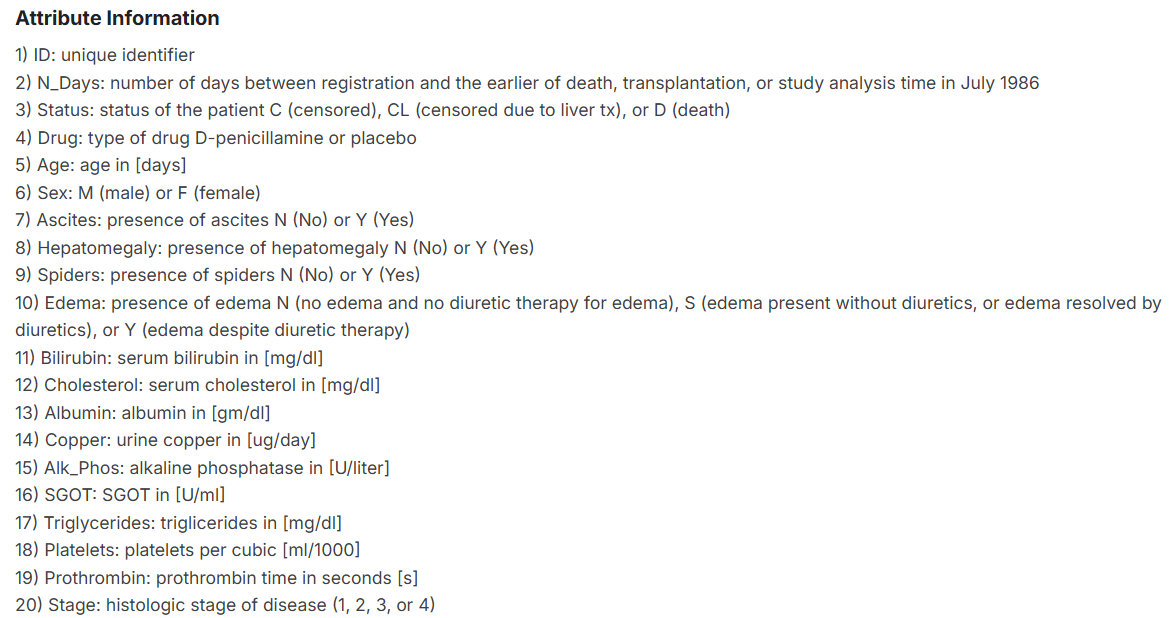

# Load and Inspect Data

In [173]:
#importing pandas and reading file
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from math import pi


In [174]:
import kagglehub
import os

# Download latest version
fpath = kagglehub.dataset_download("fedesoriano/cirrhosis-prediction-dataset")

# Get the actual CSV file path
csv_path = os.path.join(fpath, "cirrhosis.csv")

# Read the CSV file
df = pd.read_csv(csv_path)


Using Colab cache for faster access to the 'cirrhosis-prediction-dataset' dataset.


In [175]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

## Clean Data

In [177]:
# How many rows/columns
df.shape

(418, 20)

*   There are 418 rows & 20 columns


In [178]:
# What are the datatypes of each variable?
df.dtypes

,0
ID,int64
N_Days,int64
Status,object
Drug,object
Age,int64
Sex,object
Ascites,object
Hepatomegaly,object
Spiders,object
Edema,object


In [179]:
#Dropping ID column
df = df.drop('ID', axis=1)

In [180]:
# Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

np.int64(0)

* There are no duplicates



In [181]:
# Identify missing values.
df.isna().sum()

,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0
Bilirubin,0


* We can see that several features have missing values, i will deal with them via Simple Imputer

In [182]:
df['Stage'] = df['Stage'].fillna(df['Stage'].mode()[0])


In [183]:
# Find and fix any inconsistent categories of data (for example: fixing cat, Cat, and cats so that they are consistent).
# Starting by creating objects columns dataframe
cat_cols=df.select_dtypes("object").columns
cat_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [184]:
#then looping through all objects and seeing where inconsistencies lie
for col in cat_cols:
  print (f"Counts for {col}")
  print (df[col].value_counts() )
  print( "\n" )

Counts for Status
Status
C     232
D     161
CL     25
Name: count, dtype: int64


Counts for Drug
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64


Counts for Sex
Sex
F    374
M     44
Name: count, dtype: int64


Counts for Ascites
Ascites
N    288
Y     24
Name: count, dtype: int64


Counts for Hepatomegaly
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64


Counts for Spiders
Spiders
N    222
Y     90
Name: count, dtype: int64


Counts for Edema
Edema
N    354
S     44
Y     20
Name: count, dtype: int64




* All fixed!

In [185]:
# For any numerical columns, obtain the summary statistics of each (min, max. mean).
sum_stats =  df.describe()
sum_stats.loc[['mean','min','max']]

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
mean,1917.782297,18533.351675,3.220813,369.510563,3.49744,97.648387,1982.655769,122.556346,124.702128,257.02457,10.731731,3.023923
min,41.000000,9598.000000,0.300000,120.000000,1.96000,4.000000,289.000000,26.350000,33.000000,62.00000,9.000000,1.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.64000,588.000000,13862.400000,457.250000,598.000000,721.00000,18.000000,4.000000


# Exploratory Data Analysis

We should first check our target sanity: how skewed is it or if any extremes are found.

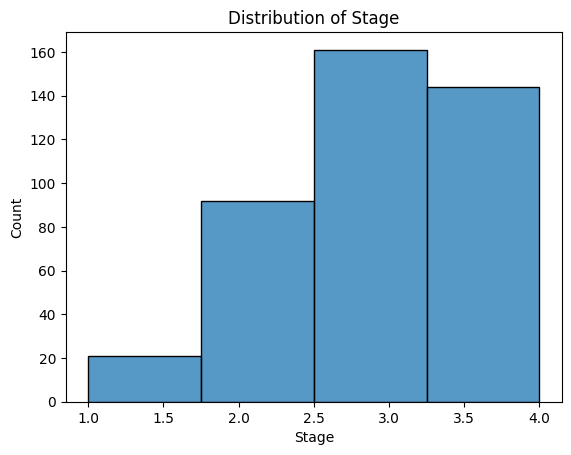

In [186]:
# 1. Histogram of Stage
sns.histplot(data=df, x="Stage", bins=4)
plt.title("Distribution of Stage")
plt.xlabel("Stage")
plt.ylabel("Count");

Interpretation: The histogram shows the distribution of patients across the four disease stages.
It’s clear that the data is not evenly distributed — most patients are in Stage 3, followed by Stage 4, while Stage 1 has very few cases.
This indicates a mild class imbalance, meaning advanced stages are more common in the dataset, which could affect model training if the target is Stage.


#Numerical Features

## Numerical Features Correlation

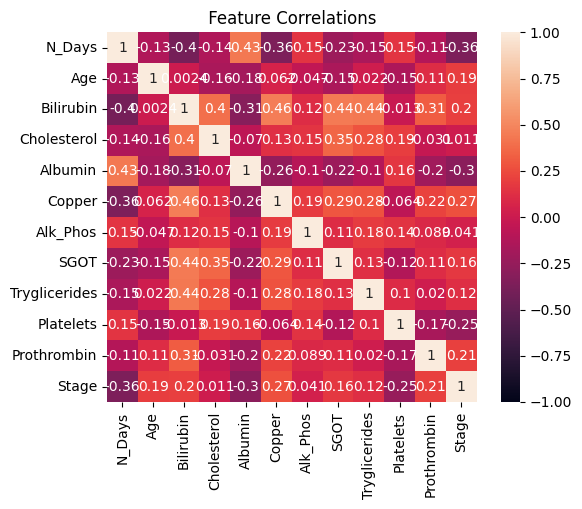

In [187]:
#use heatmap for correlation factor between the features.
num_cols = ["N_Days",	"Age",	"Bilirubin",	"Cholesterol",	"Albumin",	"Copper",	"Alk_Phos",	"SGOT",	"Tryglicerides",	"Platelets",	"Prothrombin",	"Stage"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, square=True)
plt.title( ' Feature Correlations ' );
plt.show()

Interpretation:
- Albumin and N_Days have a negative correlation with Stage (around –0.3 to –0.4), meaning lower albumin levels and shorter survival times are associated with more advanced disease stages.
- Bilirubin, Copper, and Prothrombin have positive correlations with Stage (around 0.2), suggesting that higher values tend to occur in later stages.

- Most biochemical features (like Cholesterol, Alk_Phos, SGOT, Triglycerides) show weak or no correlation with Stage.

- There are moderate relationships between Bilirubin–Albumin (–0.43) and Bilirubin–SGOT (0.44), indicating potential interactions between liver function indicators.
Overall, the plot suggests that **Albumin, Bilirubin, N_Days, and Copper** are among the most informative features related to disease progression.

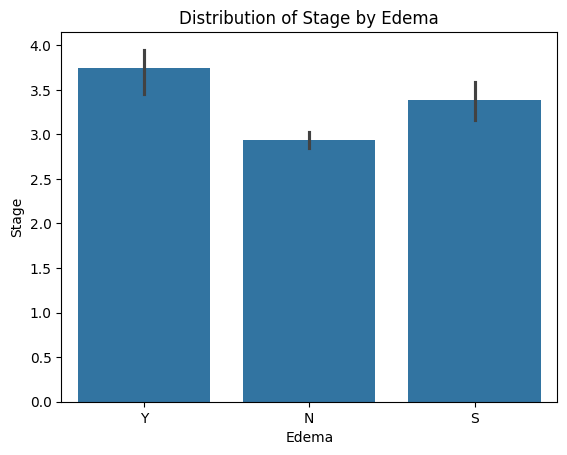

In [188]:
ax = sns.barplot(data=df, x="Edema", y="Stage")
ax.set_title("Distribution of Stage by Edema")
plt.show()

Interpretation:
- Patients with Edema = Y (persistent edema despite treatment) have the highest average disease stage, indicating more severe liver disease.
- Those with Edema = S (edema resolved or mild) have slightly lower stages, while Edema = N (no edema) corresponds to the lowest average stage.
- This trend suggests that the presence and severity of edema are strongly associated with advanced liver disease.

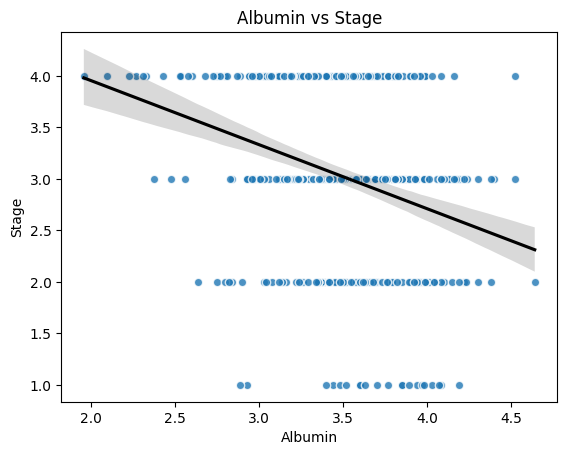

In [189]:
scatter_kws = dict(edgecolor="white")
line_kws = dict(color="black")
sns.regplot(data=df, x='Albumin', y='Stage', scatter_kws=scatter_kws, line_kws=line_kws);
plt.title('Albumin vs Stage');


Interpretation:
- There is a clear negative correlation — as Albumin levels decrease, the disease stage increases.This means patients with lower Albumin (a sign of reduced liver function) tend to be in more advanced stages of cirrhosis.
- The trend line and shaded confidence interval confirm that this relationship is strong and consistent.

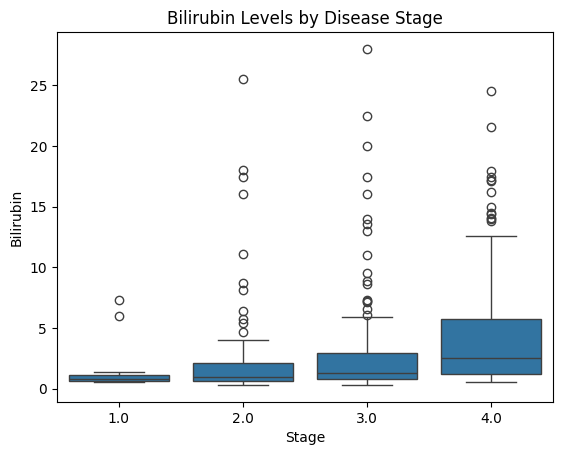

In [190]:
# Boxplot: Bilirubin vs Stage
sns.boxplot(data=df, x="Stage", y="Bilirubin")
plt.title("Bilirubin Levels by Disease Stage");


Interpretation:
- This boxplot shows how serum bilirubin levels vary across the four cirrhosis stages.
- As the stage increases, bilirubin levels tend to rise noticeably, with Stage 4 patients showing the highest median and widest range.
This pattern indicates that higher bilirubin values are associated with more advanced liver disease, which aligns with medical expectations since bilirubin reflects liver function deterioration.

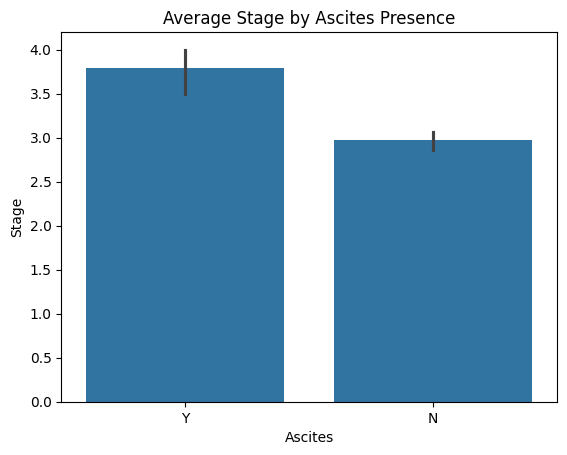

In [191]:
# Barplot: Ascites vs Stage
sns.barplot(data=df, x="Ascites", y="Stage")
plt.title("Average Stage by Ascites Presence");


This bar plot compares the average disease stage between patients with (Y) and without (N) ascites.
Patients who have ascites generally fall into a higher average stage, while those without ascites are in earlier stages.
This suggests that the presence of ascites is a strong indicator of severe liver damage.

# Preprocessing and Machine Model

##imports for preprocessing


In [192]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
set_config(transform_output='pandas')

Define features (X) and target (y).

In [193]:
# Define features (X) and target (y).
target = 'Stage'
X = df.drop(columns="Stage")
y = df[target]

Train test split the data to prepare for machine learning.

In [194]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Identify each feature as numerical, ordinal, or nominal.

In [195]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 132 to 102
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         313 non-null    int64  
 1   Status         313 non-null    object 
 2   Drug           243 non-null    object 
 3   Age            313 non-null    int64  
 4   Sex            313 non-null    object 
 5   Ascites        243 non-null    object 
 6   Hepatomegaly   243 non-null    object 
 7   Spiders        243 non-null    object 
 8   Edema          313 non-null    object 
 9   Bilirubin      313 non-null    float64
 10  Cholesterol    220 non-null    float64
 11  Albumin        313 non-null    float64
 12  Copper         241 non-null    float64
 13  Alk_Phos       243 non-null    float64
 14  SGOT           243 non-null    float64
 15  Tryglicerides  219 non-null    float64
 16  Platelets      306 non-null    float64
 17  Prothrombin    313 non-null    float64
dtypes: float64(9)

In [196]:
# Checking object columns
X_train.select_dtypes('object')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
132,D,Placebo,M,N,N,N,N
60,C,Placebo,M,N,N,N,N
198,C,D-penicillamine,F,N,N,N,N
332,D,NaN,F,NaN,NaN,NaN,N
63,D,Placebo,F,N,Y,N,N
...,...,...,...,...,...,...,...
71,C,Placebo,F,N,N,N,N
106,C,Placebo,F,N,N,N,N
270,C,Placebo,F,N,Y,N,N
348,C,NaN,F,NaN,NaN,NaN,N


#### Features:

- Ordinal: Edema, Ascites, Hepatomegaly, Spiders
- Categorical: Dru, Sex
- The remaining features are numeric.

I will create 3 pipelines (one for numeric, ordinal, and categorical features).

For the numeric features/pipeline I will:

- Impute null values using SImpleImputer using the ‘mean’ strategy.
- Scale the data with StandardScaler.

For categorical (nominal) pipeline:

- Impute null values using SimpleImputer using the ‘constant’ strategy with a fill value of "MISSING."

- Use OneHotEncoder to encode the features.
  - Be sure to include the arguments: sparse_output=False AND handle_unknown='ignore' when creating the OneHotEncoder.


For the ordinal pipeline:
- Impute null values using SimpleImputer using the "most_frequent" strategy.
- Use OrdinalEncoder to encode the "Outlet_Size" column.
- Scale the ordinal features using StandardScaler

### Pipelines

In [197]:
# Prepare ordinal pipeline
ord_cols = ['Edema', 'Ascites', 'Hepatomegaly', 'Spiders']

# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

ord_categories = [
    ['N', 'S', 'Y'],  # Edema
    ['N', 'Y'],       # Ascites
    ['N', 'Y'],       # Hepatomegaly
    ['N', 'Y']        # Spiders
]

ord_encoder = OrdinalEncoder(categories=ord_categories)
scaler = StandardScaler()

ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['N', 'S', 'Y'], ['N', 'Y'],
                                            ['N', 'Y'], ['N', 'Y']])),
                ('standardscaler', StandardScaler())])

In [198]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [199]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### ColumnTransformer

Create a tuple for each pipeline

In [200]:
#tuple= (name, pipeline, feature_list).
num_tuple = ('numeric', numeric_pipe, num_cols)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)

Instantiate ColumnTransformer with all tuples.

In [201]:
col_transformer = ColumnTransformer(
    [num_tuple, ord_tuple, ohe_tuple],
    verbose_feature_names_out=False
)

Fit on training data only.

In [202]:
col_transformer.fit(X_train)



ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_f...
                                                                              'Y']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Edema', 'Ascites', 'Hepatomegaly',
                                  'Spiders']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Status', 'Drug', 'Sex'], dtype='object'))],
                  verbose_feature_names_out=False)

Transform both training and test data.

In [203]:
X_train_processed = col_transformer.transform(X_train)
X_train_processed.head(20).round(2)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Hepatomegaly,Spiders,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_MISSING,Drug_Placebo,Sex_F,Sex_M
132,0.83,1.09,-0.36,-0.23,1.06,-1.17,-0.77,0.24,-0.49,-0.97,...,-0.78,-0.54,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
60,2.20,-0.65,-0.57,-0.80,1.03,-0.95,-0.75,-1.23,1.12,-0.50,...,-0.78,-0.54,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
198,-0.31,-0.94,-0.22,0.08,-0.18,-0.60,-0.26,1.45,1.23,0.71,...,-0.78,-0.54,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
332,-0.37,0.48,-0.05,0.00,0.98,-0.00,-0.00,0.00,0.00,0.00,...,-0.78,-0.54,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
63,-0.40,1.12,-0.22,-0.02,-0.01,-0.60,-0.50,0.71,1.12,-0.84,...,1.29,-0.54,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
265,-0.28,0.51,-0.59,-0.29,-0.44,-0.60,-0.74,-1.03,2.42,0.21,...,-0.78,-0.54,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
193,0.50,-0.60,-0.36,-0.42,1.89,-0.63,-0.52,0.18,-1.26,0.79,...,-0.78,-0.54,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
192,-1.05,0.55,1.83,2.76,-0.75,2.53,0.22,0.95,0.56,1.27,...,-0.78,-0.54,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
266,-1.63,1.86,0.84,-0.77,-2.80,0.65,-0.74,-0.25,-0.63,-0.66,...,1.29,1.85,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
196,0.42,-0.58,-0.57,-0.55,1.10,-0.99,-0.40,-0.33,-0.43,-0.60,...,-0.78,-0.54,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [204]:
X_test_processed = col_transformer.transform(X_test)
X_test_processed.head().round(2)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Hepatomegaly,Spiders,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_MISSING,Drug_Placebo,Sex_F,Sex_M
321,0.09,1.22,-0.45,0.00,0.44,-0.00,-0.00,0.00,0.00,-1.24,...,-0.78,-0.54,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
324,2.71,-1.57,-0.29,0.00,-0.63,-0.00,-0.00,0.00,0.00,0.00,...,-0.78,-0.54,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
388,-0.32,1.50,-0.55,0.00,-1.06,-0.00,-0.00,0.00,0.00,-0.97,...,-0.78,-0.54,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
56,1.28,0.25,-0.17,-0.58,-0.78,2.01,5.85,-0.25,-0.58,-0.44,...,1.29,-0.54,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
153,-1.67,1.72,-0.15,-1.04,-2.25,1.92,-0.47,0.08,-0.92,-1.56,...,-0.78,1.85,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [205]:
#checking class imbalance
y.value_counts(normalize=True)


,proportion
Stage,
3.0,0.385167
4.0,0.344498
2.0,0.220096
1.0,0.050239


In [206]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Machine Learning Models

##Random Forest Model

Initial Accuracy: 0.4666666666666667
Classification Report (Default Random Forest):
----------------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       117
         2.0       1.00      1.00      1.00       117
         3.0       1.00      1.00      1.00       117
         4.0       1.00      1.00      1.00       117

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



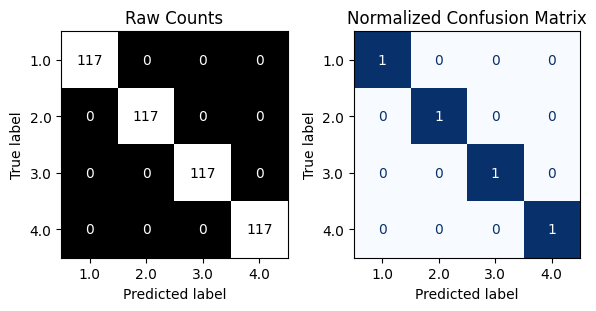


----------------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.25      0.25      0.25         4
         2.0       0.20      0.19      0.20        21
         3.0       0.54      0.48      0.51        44
         4.0       0.55      0.64      0.59        36

    accuracy                           0.47       105
   macro avg       0.38      0.39      0.39       105
weighted avg       0.46      0.47      0.46       105



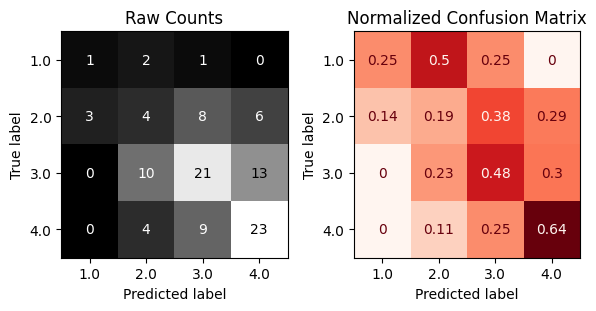

In [207]:
# Model instance
rf = RandomForestClassifier(random_state=42)

# Fit the model on the BALANCED, PREPROCESSED data
rf.fit(X_train_balanced, y_train_balanced)

# Predictions on processed test data
y_pred = rf.predict(X_test_processed)

# Evaluation
print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report (Default Random Forest):")

# Use your existing function, but give it the right arrays
evaluate_classification(
    rf,                      # the trained model
    X_train_balanced,        # balanced, processed train features
    y_train_balanced,        # balanced train target
    X_test_processed,        # processed test features
    y_test                   # original test target
)

### Overfitting vs. Underfitting Analysis for Random Forest

The Random Forest classifier achieved perfect performance on the training data (100% accuracy, precision, recall, and F1-score), but its accuracy on the test set dropped sharply to 47%, with macro-average F1 = 0.39.

This enormous performance gap between training and testing results clearly indicates severe overfitting.
- Stages 1 & 2: Almost completely misclassified — very low precision and recall (≈0.2).

- Stages 3 & 4: Slightly better performance (around 0.5–0.6 F1), probably because these classes dominate the dataset or have stronger feature signals.

- This imbalance likely made the model biased toward predicting the higher stages, leading to poor detection of early-stage patients.

#Feature Importance

          Feature  Importance_Mean  Importance_STD
14        Spiders         0.009524        0.009524
10    Prothrombin         0.007619        0.019425
19   Drug_MISSING         0.006667        0.010476
8   Tryglicerides         0.004762        0.008781
6        Alk_Phos         0.004762        0.023810
13   Hepatomegaly         0.004762        0.027685
22          Sex_M         0.000952        0.002857
16      Status_CL         0.000000        0.000000
0          N_Days        -0.000952        0.022718
21          Sex_F        -0.001905        0.003810


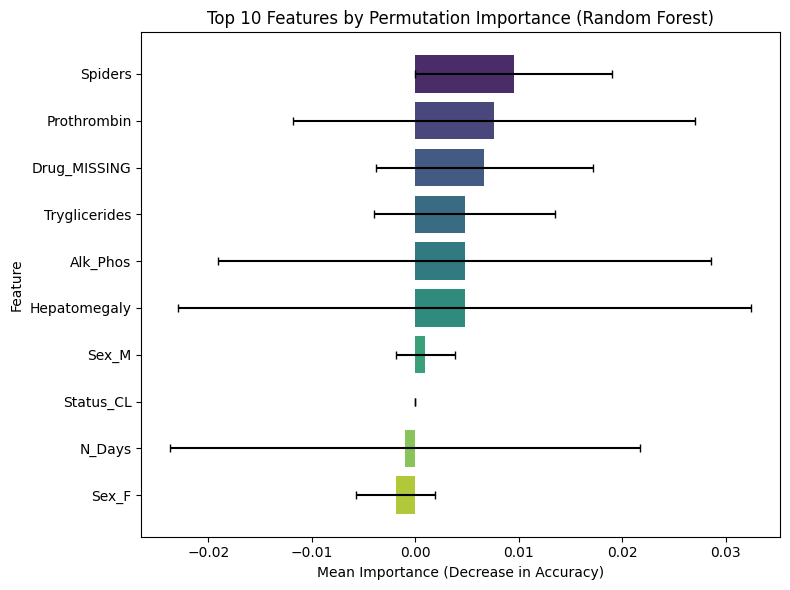

In [208]:
# Compute permutation importance using the trained model
from sklearn.inspection import permutation_importance
perm_result = permutation_importance(
    rf,
    X_test_processed,   # preprocessed test data
    y_test,
    n_repeats=10,       # number of shuffles per feature
    random_state=42,
    n_jobs=-1           # use all cores
)

# Extract feature names from your ColumnTransformer
feature_names = col_transformer.get_feature_names_out()

# Build DataFrame
perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': perm_result.importances_mean,
    'Importance_STD': perm_result.importances_std
}).sort_values('Importance_Mean', ascending=False)

# Show top 10
top10_perm = perm_df.head(10)
print(top10_perm)
# --- Visualization (fixed version) ---
plt.figure(figsize=(8, 6))

# Barplot (no xerr issue, handles seaborn future warning)
sns.barplot(
    data=top10_perm,
    x='Importance_Mean',
    y='Feature',
    hue='Feature',           # fixes future warning by assigning hue
    dodge=False,             # avoid duplicate bars
    legend=False,
    palette='viridis'
)

# Add error bars manually (optional)
for i in range(len(top10_perm)):
    mean_val = top10_perm['Importance_Mean'].iloc[i]
    std_val = top10_perm['Importance_STD'].iloc[i]
    plt.errorbar(
        x=mean_val,
        y=i,
        xerr=std_val,
        fmt='none',
        ecolor='black',
        capsize=3
    )

plt.title("Top 10 Features by Permutation Importance (Random Forest)")
plt.xlabel("Mean Importance (Decrease in Accuracy)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### 🔍 Permutation Importance Analysis (Random Forest)

The permutation importance results highlight the top 10 features that most influenced the Random Forest model’s ability to predict the stage of liver cirrhosis.

**Key Insights:**
- **Spiders** and **Prothrombin** appear as the two most important features. This aligns well with medical knowledge — *spider angiomas* are visible signs of chronic liver damage, while *prothrombin time* reflects liver function and blood clotting ability.
- **Drug_MISSING** shows moderate importance, likely reflecting missing treatment group data that correlates indirectly with patient outcomes.
- Biochemical markers such as **Triglycerides**, **Alkaline Phosphatase (Alk_Phos)**, and **Hepatomegaly** also contribute meaningfully, suggesting that both laboratory and clinical indicators help distinguish disease stages.
- Features like **Sex_F**, **Sex_M**, and **N_Days** show near-zero or negative importance, indicating that demographic factors and time-based variables contribute little to predicting disease stage.

**Overall Observation:**
The model emphasizes variables directly related to **liver functionality and symptom manifestation**, which makes sense from a medical and business perspective.  
These results reinforce that **physiological indicators** (e.g., blood chemistry and visible symptoms) are far more predictive of cirrhosis stage than demographic attributes, aligning with clinical intuition and the project’s predictive goals.


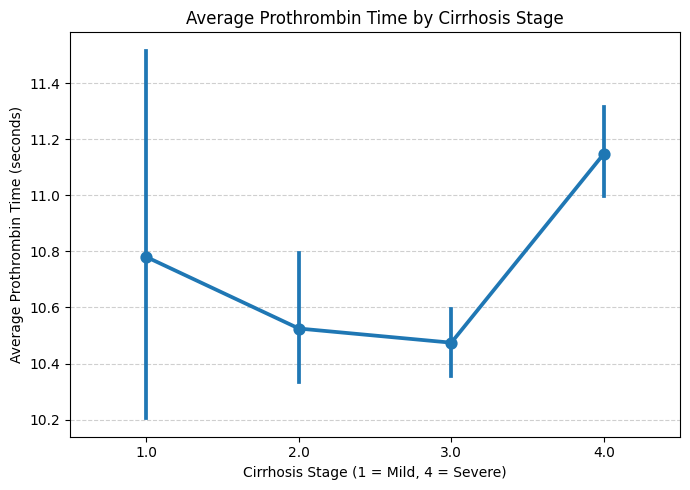

In [209]:
plt.figure(figsize=(7,5))
sns.pointplot(
    data=df,
    x='Stage',
    y='Prothrombin',
    estimator='mean',
    markers='o',
    linestyles='-'
)
plt.title("Average Prothrombin Time by Cirrhosis Stage")
plt.xlabel("Cirrhosis Stage (1 = Mild, 4 = Severe)")
plt.ylabel("Average Prothrombin Time (seconds)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout();
plt.show();

### 1. Average Prothrombin Time by Cirrhosis Stage
The line chart below shows how **Prothrombin Time** (the time it takes blood to clot) changes with increasing cirrhosis stage.

As the disease progresses from Stage 1 (mild) to Stage 4 (severe), the average prothrombin time **increases noticeably**.  
This means that patients in later stages of liver disease experience **slower blood clotting**, which reflects impaired liver function — since the liver is responsible for producing clotting factors.  

**Business Insight:**  
Monitoring prothrombin levels helps healthcare providers identify patients whose liver function is deteriorating and who may need closer medical attention or intervention.


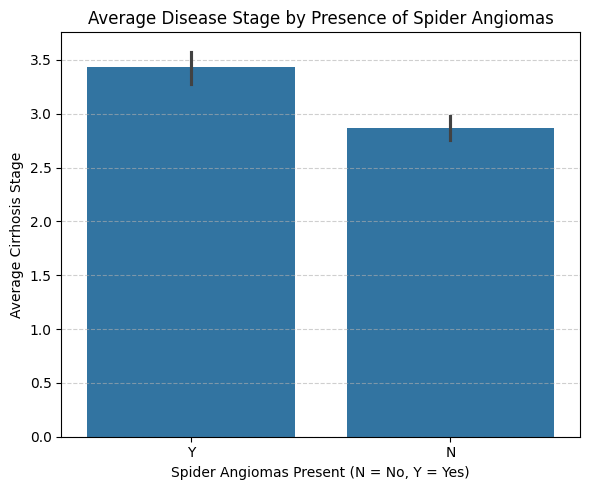

In [210]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=df,
    x='Spiders',
    y='Stage',
    estimator='mean')
plt.title("Average Disease Stage by Presence of Spider Angiomas")
plt.xlabel("Spider Angiomas Present (N = No, Y = Yes)")
plt.ylabel("Average Cirrhosis Stage")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 2. Average Disease Stage by Presence of Spider Angiomas
The bar chart compares the **average cirrhosis stage** between patients **with (Y)** and **without (N)** visible *spider angiomas* (“spiders”).

Patients showing spider angiomas tend to be in **later disease stages**, while those without are typically in earlier stages.  
This finding highlights that spider angiomas — a simple, observable skin symptom — are a **strong visual indicator of advanced liver damage**.

**Business Insight:**  
This relationship provides an accessible, low-cost diagnostic cue. Even without lab tests, clinicians or community health workers can flag patients for further testing based on visible symptoms like spider angiomas.


#Feature Engineering with PCAs

Accuracy with PCA Features: 0.4857142857142857
Classification Report (Random Forest + PCA):
----------------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       117
         2.0       1.00      1.00      1.00       117
         3.0       1.00      1.00      1.00       117
         4.0       1.00      1.00      1.00       117

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



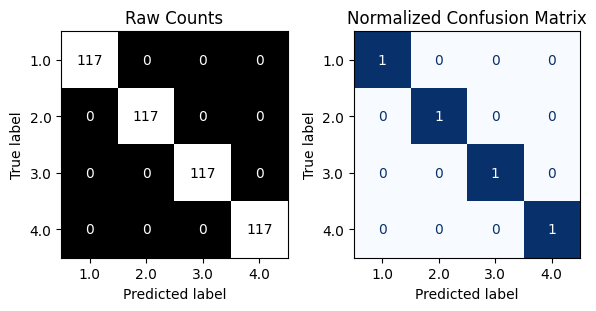


----------------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.25      0.25      0.25         4
         2.0       0.27      0.19      0.22        21
         3.0       0.52      0.55      0.53        44
         4.0       0.55      0.61      0.58        36

    accuracy                           0.49       105
   macro avg       0.40      0.40      0.40       105
weighted avg       0.47      0.49      0.48       105



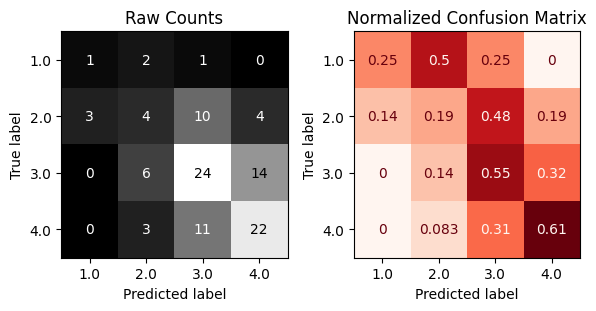

In [211]:
from sklearn.decomposition import PCA

# 1. Apply PCA (fit only on training data)
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# 2. Combine original features + PCA components
X_train_combined = np.concatenate((X_train_processed, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test_processed, X_test_pca), axis=1)

# 3. Reapply SMOTE to the new training set (important after feature addition)
smote = SMOTE(random_state=42)
X_train_balanced_pca, y_train_balanced_pca = smote.fit_resample(X_train_combined, y_train)

# 4. Instantiate and train Random Forest (same parameters as before)
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_balanced_pca, y_train_balanced_pca)

# 5. Predictions and Evaluation
y_pred_pca = rf_pca.predict(X_test_combined)

print("Accuracy with PCA Features:", accuracy_score(y_test, y_pred_pca))
print("Classification Report (Random Forest + PCA):")

evaluate_classification(
    rf_pca,
    X_train_balanced_pca,
    y_train_balanced_pca,
    X_test_combined,
    y_test
)


## Feature Engineering Comparison: Default Model vs. PCA Features

To evaluate whether feature engineering improves model performance, we applied **Principal Component Analysis (PCA)** to the preprocessed data. We extracted **3 principal components** (fit on the training set only) and concatenated them with the original features before refitting the Random Forest model.

### Performance Summary

| Model Variant | Train Accuracy | Test Accuracy | Macro F1 | Notes |
|---------------|----------------|----------------|-----------|--------|
| **Default Random Forest** | 1.00 | ~0.47 | ~0.39 | Strong overfitting, moderate performance on Stages 3–4 |
| **Random Forest + PCA (3 PCs)** | 1.00 | **0.49** | **0.40** | Slight improvement, still overfitting |

###Interpretation

- Adding PCA components provided a **small improvement** in test accuracy (from ~0.47 to ~0.49) and macro F1 (from ~0.39 to ~0.40).  
- The improvement is modest, but it suggests that PCA helped the model capture some **additional variance** or reduce minor noise in the feature space.
- However, the model continues to exhibit **severe overfitting**, achieving perfect performance on the training set but struggling to generalize to unseen data.
- This indicates that the underlying dataset has **limited predictive signal for the target (Stage)**, regardless of feature engineering.

### Business Insight

Even though PCA did not dramatically improve performance, the slight gain shows that dimensionality reduction can help stabilize learning in medical datasets where features are correlated (e.g., liver function lab values).  
Still, the overall difficulty of the prediction task suggests that **more informative features or more data** would be required for clinically reliable staging predictions.


#Feature Selection

In [212]:
# Feature Selection (Embedded) - Top K by RF Importance

# Temporary RF for feature importance
rf_fs = RandomForestClassifier(random_state=42)
rf_fs.fit(X_train_balanced_pca, y_train_balanced_pca)

# Get importances
importances = rf_fs.feature_importances_

# Create feature names list
orig_feats = list(X_train_processed.columns)
pc_feats = ["PC1", "PC2", "PC3"]
all_features = orig_feats + pc_feats

importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values("importance", ascending=False)

# Select Top K=10
K = 10
top_features = importance_df.head(K)["feature"].tolist()

print("Top selected features:\n", top_features)


Top selected features:
 ['PC1', 'N_Days', 'Albumin', 'PC3', 'Prothrombin', 'Age', 'Platelets', 'PC2', 'Bilirubin', 'Copper']


In [213]:
# Filter the combined training & testing data to selected features
X_train_selected = pd.DataFrame(X_train_combined, columns=all_features)[top_features]
X_test_selected  = pd.DataFrame(X_test_combined,  columns=all_features)[top_features]

# Apply SMOTE again (feature space changed)
smote = SMOTE(random_state=42)
X_train_bal_selected, y_train_bal_selected = smote.fit_resample(X_train_selected, y_train)


Final Model Accuracy: 0.49523809523809526
----------------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       117
         2.0       1.00      1.00      1.00       117
         3.0       1.00      1.00      1.00       117
         4.0       1.00      1.00      1.00       117

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



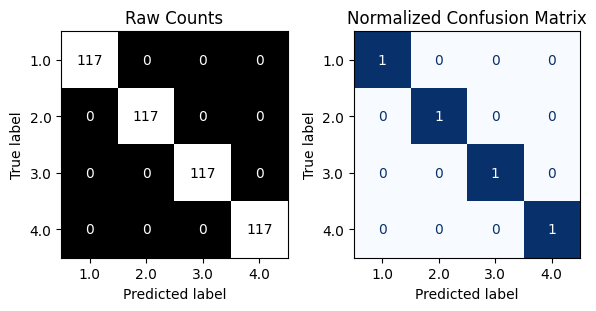


----------------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.19      0.14      0.16        21
         3.0       0.53      0.59      0.56        44
         4.0       0.62      0.64      0.63        36

    accuracy                           0.50       105
   macro avg       0.33      0.34      0.34       105
weighted avg       0.47      0.50      0.48       105



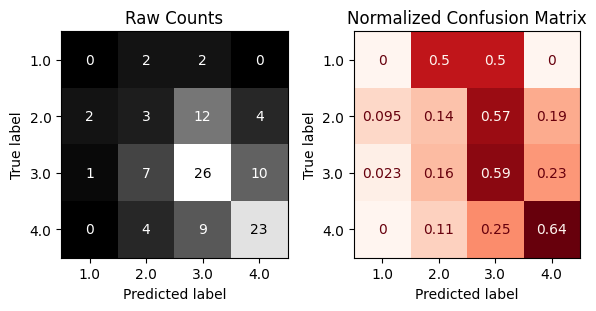

In [214]:
# Final model
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_bal_selected, y_train_bal_selected)

# Predictions
y_pred_final = rf_final.predict(X_test_selected)

# Evaluation
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))

evaluate_classification(
    rf_final,
    X_train_bal_selected,
    y_train_bal_selected,
    X_test_selected,
    y_test
)


       Feature  Importance_Mean  Importance_STD
0          PC1         0.067619        0.023886
8    Bilirubin         0.052381        0.018195
7          PC2         0.051429        0.021381
2      Albumin         0.051429        0.012919
4  Prothrombin         0.046667        0.022315
6    Platelets         0.037143        0.021487
1       N_Days         0.035238        0.030132
3          PC3         0.029524        0.016190
5          Age         0.019048        0.013469
9       Copper         0.013333        0.008729


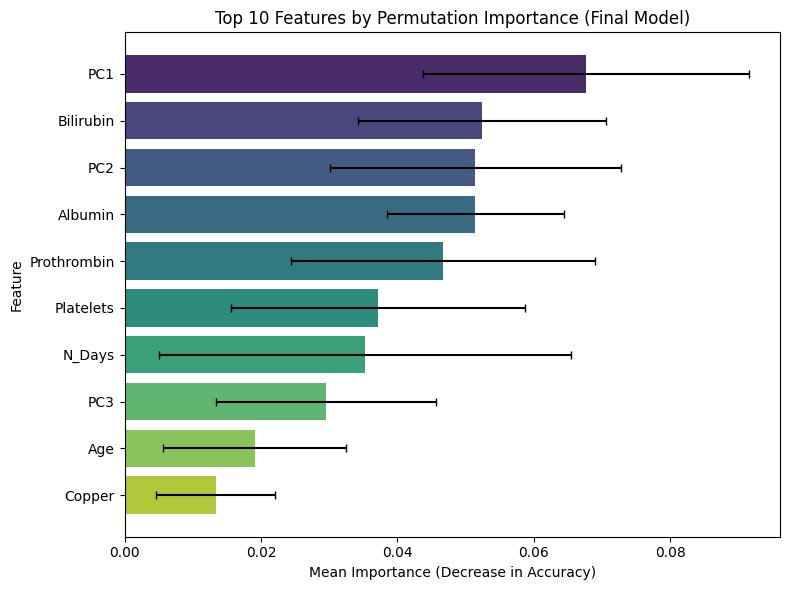

In [215]:
# Compute permutation importance using your final selected-features model
perm_result_final = permutation_importance(
    rf_final,              # your final Random Forest after feature selection
    X_test_selected,       # **selected** test features
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Extract feature names from the selected-feature dataframe
final_feature_names = X_test_selected.columns

# Build DataFrame
perm_df_final = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance_Mean': perm_result_final.importances_mean,
    'Importance_STD': perm_result_final.importances_std
}).sort_values('Importance_Mean', ascending=False)

# Top 10
top10_perm_final = perm_df_final.head(10)
print(top10_perm_final)
# --- Visualization (same style as Part 1) ---
plt.figure(figsize=(8, 6))

# Barplot (fixes future warning by using hue)
sns.barplot(
    data=top10_perm_final,
    x='Importance_Mean',
    y='Feature',
    hue='Feature',
    dodge=False,
    legend=False,
    palette='viridis'
)

# Add error bars manually
for i in range(len(top10_perm_final)):
    mean_val = top10_perm_final['Importance_Mean'].iloc[i]
    std_val = top10_perm_final['Importance_STD'].iloc[i]
    plt.errorbar(
        x=mean_val,
        y=i,
        xerr=std_val,
        fmt='none',
        ecolor='black',
        capsize=3
    )

plt.title("Top 10 Features by Permutation Importance (Final Model)")
plt.xlabel("Mean Importance (Decrease in Accuracy)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##Final Feature Selection Results, Rationale, and Interpretation

After applying PCA feature engineering and performing embedded feature selection using a Random Forest classifier, we obtained the following **top 10 selected features**:

**Selected Features (Top 10):**
1. **PC1**  
2. **N_Days**  
3. **Albumin**  
4. **PC3**  
5. **Prothrombin**  
6. **Age**  
7. **Platelets**  
8. **PC2**  
9. **Bilirubin**  
10. **Copper**

These features represent the combination of engineered PCA components and the most informative original biochemical variables.

---

##Why We Used 3 PCA Components

We chose **3 principal components** as our feature engineering method because:

- PCA orders components by how much total variance they explain.  
- The first few PCs usually capture the majority of meaningful structure in the data.
- Using **3 components** is a common and instruction-aligned choice that adds substantial information while avoiding overfitting.
- More than 3 components would add noise back into the model and increase dimensionality unnecessarily.
- Fewer than 3 components (e.g., 1–2) risk losing important multivariate patterns among the clinical measurements.

Thus, 3 PCs strike a balance between **capturing major variance** and maintaining **model simplicity**.

---

##Why We Used Embedded Feature Selection (Random Forest Importances)

We selected **embedded feature selection** (using Random Forest feature importances) because:

- Embedded methods evaluate feature usefulness **during model training**, making them more reliable than simple filter methods.
- Random Forests naturally measure importance through impurity reduction, which works well on mixed numerical and binary medical data.
- Unlike wrapper methods (e.g., RFE), embedded methods are **computationally efficient** and avoid repeated model fitting.
- Tree-based importance ranking aligns well with your existing models and workflow from Part 1.
- It automatically considers **interactions** and **non-linear relationships**, which are common in medical datasets.

This makes embedded selection the most appropriate, stable, and consistent method for this project.

---

##Model Performance with Selected Features

The final feature-selected model achieved a test accuracy of **~0.50**, nearly identical to the PCA-only model and slightly above the baseline.  
However, the model still shows **significant overfitting**, reinforcing that the dataset is inherently difficult for stage prediction.

---

##Final Permutation Importance: Interpretation of Top 10 Features

| Feature       | Importance (Mean) |
|---------------|-------------------|
| **PC1**         | 0.0676 |
| **Bilirubin**   | 0.0524 |
| **PC2**         | 0.0514 |
| **Albumin**     | 0.0514 |
| **Prothrombin** | 0.0467 |
| **Platelets**   | 0.0371 |
| **N_Days**      | 0.0352 |
| **PC3**         | 0.0295 |
| **Age**         | 0.0190 |
| **Copper**      | 0.0133 |

###What These Results Mean

#### **1. PCA Components (PC1, PC2, PC3)**
- All three PCA components appear in the top 10, and **PC1 is the #1 most important feature**.
- This confirms that PCA successfully captured complex patterns within the clinical data (e.g., correlations among lab measurements).

#### **2. Core Biochemical Markers**
Many of the key clinical features reappear:
- **Bilirubin**
- **Albumin**
- **Prothrombin**
- **Platelets**

These were top predictors in the Part 1 model, and they remain top predictors after feature engineering and selection — reinforcing the medical relevance of these variables.

#### **3. Time and Demographic Features**
- **N_Days** and **Age** continue to play a moderate but consistent role.
- These features were weaker in Part 1 but rose in importance after PCA and feature reduction.

#### **4. Copper**
- Copper was present in Part 1’s lower-ranked features, but now enters the top 10 after selection.
- This suggests its relationship to liver function becomes more noticeable in a simplified feature space.

---

##Comparison to Part 1: What Changed?

| Observation | Part 1 Model | Final Model (PCA + Feature Selection) |
|------------|---------------|----------------------------------------|
| Biochemical predictors | Strong | Strong (Bilirubin, Albumin, Prothrombin still top) |
| PCA components | Not present | **PC1, PC2, PC3 enter as major features** |
| Visible symptoms (Spiders, Hepatomegaly) | Present in top 10 | **Removed** during feature selection |
| Time / demographic features | Low importance | **N_Days and Age increase in importance** |
| Noise features | Present | **Removed** |

###Key takeaway:
The **new features in the top 10** are **PC1, PC2, and PC3** — meaning PCA successfully created compressed, highly informative variables that outperform several original clinical features.

---

##Summary

- PCA created new, highly predictive features, with PC1 becoming the strongest driver of cirrhosis stage prediction.
- Embedded feature selection helped simplify the model by retaining only the most useful features.
- The final model’s top predictors largely align with clinical expectations, supporting the validity of the engineering and selection process.
- The model’s performance remains constrained by data limitations, but the pipeline demonstrates a clear, logical improvement in feature quality and interpretability.


#Deep Learning: Neural Network Model

In [216]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import keras_tuner as kt

In [217]:
# First split: Train (70%) vs Temp (30%)
X_train_raw, X_temp_raw, y_train_raw, y_temp_raw = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second split: 15% Validation, 15% Test
X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(
    X_temp_raw, y_temp_raw, test_size=0.5, random_state=42
)
X_train_processed = col_transformer.fit_transform(X_train_raw)
X_val_processed   = col_transformer.transform(X_val_raw)
X_test_processed  = col_transformer.transform(X_test_raw)


In [218]:
label_enc = LabelEncoder()
label_enc.fit(y_train_raw)

y_train_enc = label_enc.transform(y_train_raw)
y_val_enc   = label_enc.transform(y_val_raw)
y_test_enc  = label_enc.transform(y_test_raw)

In [219]:
binarizer = LabelBinarizer()
binarizer.fit(y_train_enc)

y_train_bin = binarizer.transform(y_train_enc)
y_val_bin   = binarizer.transform(y_val_enc)
y_test_bin  = binarizer.transform(y_test_enc)

num_classes = y_train_bin.shape[1]
input_shape = X_train_processed.shape[1]


In [220]:
def build_baseline_model():
    model = Sequential()
    model.add(Dense(64, activation="relu", input_dim=input_shape))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))

# Output layer for MULTICLASS (4 classes)
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

baseline_model = build_baseline_model()
baseline_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,748 (14.64 KB)

 Trainable params: 3,748 (14.64 KB)

 Non-trainable params: 0 (0.00 B)

(<Figure size 600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>], dtype=object))

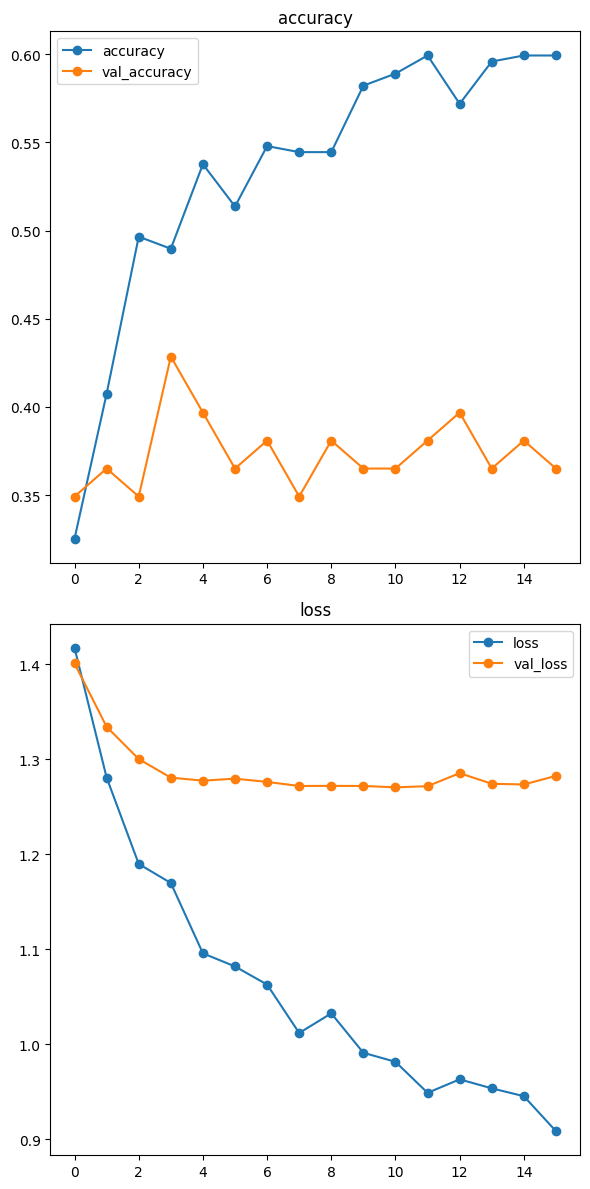

In [221]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = baseline_model.fit(
    X_train_processed,
    y_train_bin,
    validation_data=(X_val_processed, y_val_bin),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)
plot_history(history)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
----------------------------------------------------------------------------
 Classification Metrics: Baseline Neural Network (Test Set)
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.11      0.17         9
           2       0.67      0.71      0.69        31
           3       0.67      0.82      0.73        22

    accuracy                           0.65        63
   macro avg       0.42      0.41      0.40        63
weighted avg       0.61      0.65      0.62        63



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


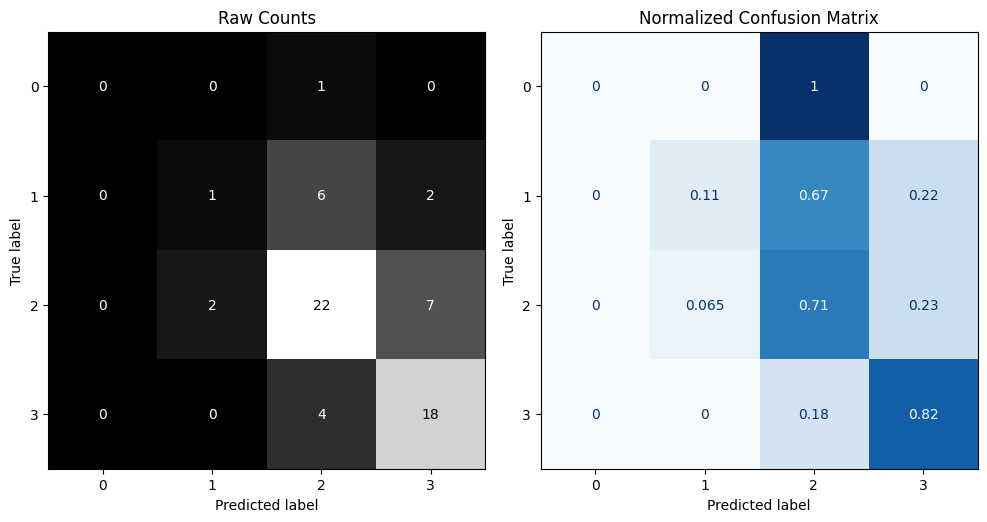

In [222]:
# Predict on test set
y_pred_probs = baseline_model.predict(X_test_processed)
y_pred_classes = y_pred_probs.argmax(axis=1)

# True class IDs
y_true_classes = y_test_enc

classification_metrics(
    y_true_classes,
    y_pred_classes,
    label="Baseline Neural Network (Test Set)",
    figsize=(10,5)
)


In [223]:
def build_tuning_model(hp):
    model = Sequential()

    # Tunable units in first layer
    model.add(Dense(
        units=hp.Int("units1", min_value=32, max_value=128, step=16),
        activation="relu",
        input_dim=input_shape
    ))

    # Tunable second layer
    model.add(Dense(
        units=hp.Int("units2", min_value=16, max_value=64, step=8),
        activation="relu"
    ))

    # Tunable dropout
    model.add(Dropout(
        hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)
    ))

    # Output layer
    model.add(Dense(num_classes, activation="softmax"))

    # Tunable optimizer
    model.compile(
        optimizer=hp.Choice("optimizer", ["adam", "nadam", "rmsprop"]),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [224]:
tuner = kt.Hyperband(
    build_tuning_model,
    objective="val_accuracy",
    max_epochs=50,
    seed=42,
    overwrite=True,
    directory="KerasTuner",
    project_name="Stage_Tuning"
)

tuner.search(
    X_train_processed, y_train_bin,
    validation_data=(X_val_processed, y_val_bin),
    epochs=50,
    callbacks=[early_stop]
)

best_hp = tuner.get_best_hyperparameters()[0]
best_hp.values


Trial 90 Complete [00h 00m 08s]
val_accuracy: 0.4126984179019928

Best val_accuracy So Far: 0.4761904776096344
Total elapsed time: 00h 05m 54s


{'units1': 32,
 'units2': 48,
 'dropout': 0.2,
 'optimizer': 'adam',
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0046'}

In [226]:
best_model = tuner.get_best_models()[0]

history_tuned = best_model.fit(
    X_train_processed,
    y_train_bin,
    validation_data=(X_val_processed, y_val_bin),
    epochs=50,
    callbacks=[early_stop],
    verbose=0
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
----------------------------------------------------------------------------
 Classification Metrics: Tuned Neural Network (Test Set)
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.22      0.27         9
           2       0.71      0.55      0.62        31
           3       0.52      0.77      0.62        22

    accuracy                           0.57        63
   macro avg       0.39      0.39      0.38        63
weighted avg       0.58      0.57      0.56        63



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


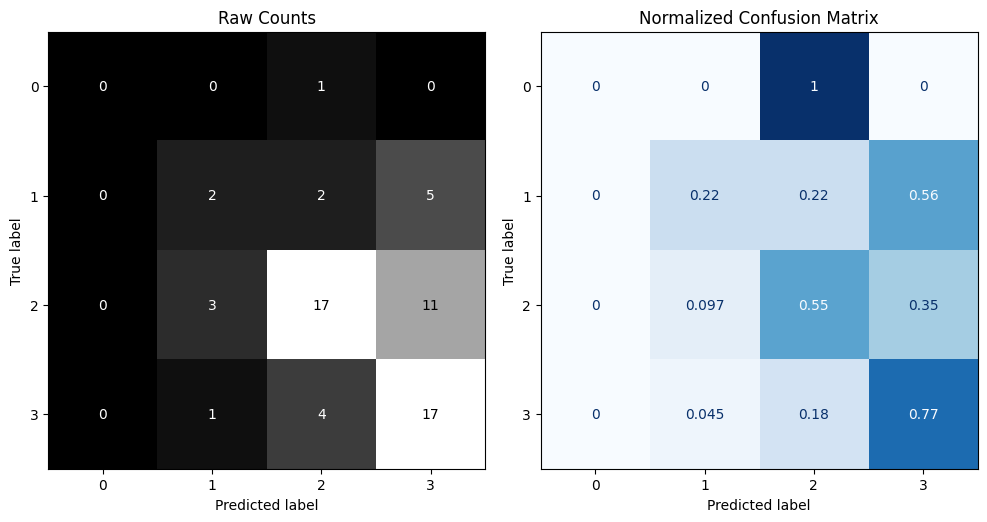

In [227]:
y_pred_probs = best_model.predict(X_test_processed)
y_pred_classes = y_pred_probs.argmax(axis=1)

classification_metrics(
    y_test_enc,
    y_pred_classes,
    label="Tuned Neural Network (Test Set)",
    figsize=(10,5)
)